In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn import metrics

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


In [2]:
data = pd.read_csv('/content/train.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/train.csv'

In [3]:
data = data.dropna()
data.head
print(data.shape)
print(list(data.columns))

(5574, 2)
['sms', 'label']


In [5]:
data.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


0    4827
1     747
Name: label, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

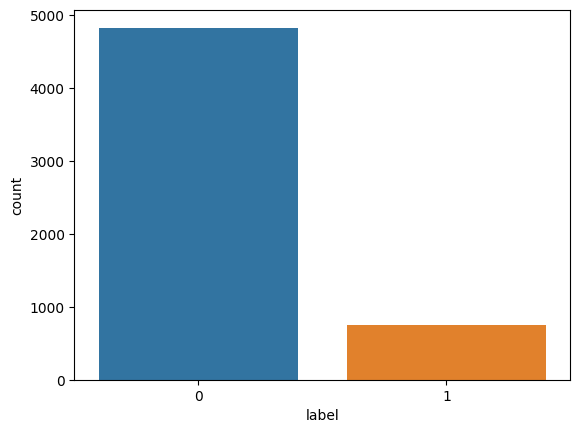

In [6]:
print(data['label'].value_counts())
sn.countplot(x='label', data=data)
plt.show

In [7]:
indices = data[data['label'] == 0].index[:1300]
data = data.drop(indices)
data['label'].value_counts()

0    3527
1     747
Name: label, dtype: int64

In [8]:
a = len(data[data['label']==0])
b = len(data[data['label']==1])
pct_of_a = a/(a+b)
print("Не спам:", pct_of_a*100)
pct_of_b = b/(a+b)
print("Спам:", pct_of_b*100)

Не спам: 82.52222742161909
Спам: 17.477772578380907


Аугументация

In [9]:
%pip install -q nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 5.2 MB/s eta 0:00:00


In [10]:
import nlpaug.augmenter.word as naw

In [11]:
aug = naw.SynonymAug(aug_src='wordnet')
aug_data = []
for i, row in data.iterrows():
    if row['label'] == 1:
        sentence = row['sms']
        augmented_sentence = aug.augment(sentence)
        augmented_sentence = ' '.join(augmented_sentence)
        aug_data.append({'label': row['label'], 'sms': augmented_sentence})

augmented_dataset = pd.DataFrame(aug_data)
augmented_dataset.to_csv('augmented.csv', index=False)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [12]:
new_data = pd.read_csv('/content/augmented.csv')

In [13]:
new_data.head()

,label,sms
0,1,Free entry in ii a wkly comprehensive to gain ...
1,1,FreeMsg Hey there darling information technolo...
2,1,WINNER! ! As a valuate network customer you ge...
3,1,Had your mobile 11 months or more than? Uracil...
4,1,half a dozen chances to win CASH! From c to 20...


In [14]:
data.head(-10)

,sms,label
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,FreeMsg Hey there darling it's been 3 week's n...,1
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1
11,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...
5559,No. I meant the calculation is the same. That ...,0
5560,"Sorry, I'll call later\n",0
5561,if you aren't here in the next &lt;#&gt; hou...,0
5562,Anything lor. Juz both of us lor.\n,0


In [16]:
dfa = new_data.append(data, ignore_index = True )
dfa.to_csv('dfa.csv', index=False)


<ipython-input-16-edf360f1ded7>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfa = new_data.append(data, ignore_index = True )


In [17]:
dfa.head(-10)

,label,sms
0,1,Free entry in ii a wkly comprehensive to gain ...
1,1,FreeMsg Hey there darling information technolo...
2,1,WINNER! ! As a valuate network customer you ge...
3,1,Had your mobile 11 months or more than? Uracil...
4,1,half a dozen chances to win CASH! From c to 20...
...,...,...
5006,0,No. I meant the calculation is the same. That ...
5007,0,"Sorry, I'll call later\n"
5008,0,if you aren't here in the next &lt;#&gt; hou...
5009,0,Anything lor. Juz both of us lor.\n


In [18]:
a = len(dfa[dfa['label']==0])
b = len(dfa[dfa['label']==1])
pct_of_a = a/(a+b)
print("Не спам:", pct_of_a*100)
pct_of_b = b/(a+b)
print("Спам:", pct_of_b*100)

Не спам: 70.24497112129058
Спам: 29.75502887870942


Предобработка текста

0    3527
1    1494
Name: label, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

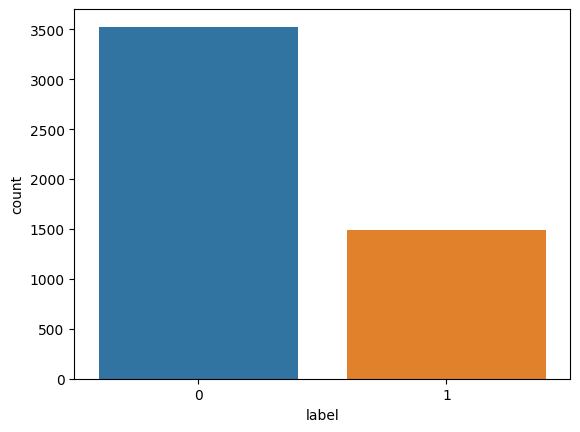

In [19]:
print(dfa['label'].value_counts())
sn.countplot(x='label', data=dfa)
plt.show

In [20]:
import nltk
import re
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
def predobrabotka(data):
  corpus = []
  if isinstance(data, str): # для string object
    data = [data]

  for i in range(len(data)):
    data_sms = re.sub('[^a-zA-Z]', ' ', data[i]).lower()
    # print(data_sms)
    tokens = nltk.word_tokenize(data_sms)
    stop = stopwords.words('english')
    cleaned_tokens = [word for word in tokens if not word in stop]
    tags = ' '.join(cleaned_tokens)
    # print(tags)
    corpus.append(tags)
  return corpus
corpus = predobrabotka(dfa['sms'])
# print(corpus)
dfa = dfa.assign(tokenized=corpus)

In [24]:
dfa.head()

,label,sms,tokenized
0,1,Free entry in ii a wkly comprehensive to gain ...,free entry ii wkly comprehensive gain fa cup f...
1,1,FreeMsg Hey there darling information technolo...,freemsg hey darling information technology wee...
2,1,WINNER! ! As a valuate network customer you ge...,winner valuate network customer get selected r...
3,1,Had your mobile 11 months or more than? Uracil...,mobile months uracil r entitle update late col...
4,1,half a dozen chances to win CASH! From c to 20...,half dozen chances win cash c pounds txt csh s...


In [25]:
X = dfa['tokenized']
Y = dfa['label']

Эмбэдинг

In [28]:
X_train,X_test,y_train,y_test = train_test_split (X, Y, test_size=0.3,random_state=32)
print(y_train.value_counts())

0    2450
1    1064
Name: label, dtype: int64


In [29]:
vector = CountVectorizer()
tfidf_transformer = TfidfTransformer()
X_train = vector.fit_transform(X_train)
X_train = tfidf_transformer.fit_transform(X_train)
X_test = vector.transform(X_test)
X_test = tfidf_transformer.transform(X_test)

In [30]:
print(y_test.value_counts())

0    1077
1     430
Name: label, dtype: int64


## Выбор классической модели

In [31]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [32]:
svc = SVC(probability=True)
neighbors = KNeighborsClassifier()
multinomial = MultinomialNB()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
regression = LogisticRegression()

In [33]:
dict_of_classic_models = {'SVC' : svc,'KNeighborsClassifier' : neighbors, 'MultinomialNB': multinomial, 'DecisionTreeClassifier': decisiontree, 'LogisticRegression': regression, 'RandomForestClassifier': randomforest}

In [34]:
for k,c in dict_of_classic_models.items():
  c.fit(X_train, y_train)

In [35]:
def train(clf, train_inputs, train_outputs):
    clf.fit(train_inputs, train_outputs)

In [36]:
pred_scores = []
conf_matrix = []
report = []
for k,c in dict_of_classic_models.items():
    train(c, X_train, y_train)
    pred = c.predict(X_test)
    pred_scores.append((k, [accuracy_score(y_test , pred)]))
    conf_matrix.append((k, metrics.confusion_matrix(y_test, pred)))
    report.append((k, classification_report(y_test, pred)))

for k, matrix in conf_matrix:
  # print(matrix)
  print(f'{k}:\n'
        f'Истинно-положительных предсказаний: {matrix[0][0]}\n',
        f'Истинно-отрицательные прогнозы: {matrix[0][1]}\n',
        f'Ложно-положительные прогнозы: {matrix[1][0]}\n',
        f'Ложно-отрицательные прогнозы: {matrix[1][1]}')

for score in pred_scores:
  print(score)


SVC:
Истинно-положительных предсказаний: 1073
 Истинно-отрицательные прогнозы: 4
 Ложно-положительные прогнозы: 23
 Ложно-отрицательные прогнозы: 407
KNeighborsClassifier:
Истинно-положительных предсказаний: 1076
 Истинно-отрицательные прогнозы: 1
 Ложно-положительные прогнозы: 254
 Ложно-отрицательные прогнозы: 176
MultinomialNB:
Истинно-положительных предсказаний: 1069
 Истинно-отрицательные прогнозы: 8
 Ложно-положительные прогнозы: 24
 Ложно-отрицательные прогнозы: 406
DecisionTreeClassifier:
Истинно-положительных предсказаний: 1039
 Истинно-отрицательные прогнозы: 38
 Ложно-положительные прогнозы: 33
 Ложно-отрицательные прогнозы: 397
LogisticRegression:
Истинно-положительных предсказаний: 1069
 Истинно-отрицательные прогнозы: 8
 Ложно-положительные прогнозы: 45
 Ложно-отрицательные прогнозы: 385
RandomForestClassifier:
Истинно-положительных предсказаний: 1075
 Истинно-отрицательные прогнозы: 2
 Ложно-положительные прогнозы: 19
 Ложно-отрицательные прогнозы: 411
('SVC', [0.9820836

In [37]:
for k, rep in report:
   print(f'{k}\n',
         f'{rep}')

SVC
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1077
           1       0.99      0.95      0.97       430

    accuracy                           0.98      1507
   macro avg       0.98      0.97      0.98      1507
weighted avg       0.98      0.98      0.98      1507

KNeighborsClassifier
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      1077
           1       0.99      0.41      0.58       430

    accuracy                           0.83      1507
   macro avg       0.90      0.70      0.74      1507
weighted avg       0.86      0.83      0.80      1507

MultinomialNB
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1077
           1       0.98      0.94      0.96       430

    accuracy                           0.98      1507
   macro avg       0.98      0.97      0.97      1507
weighted avg       0.98      0.9

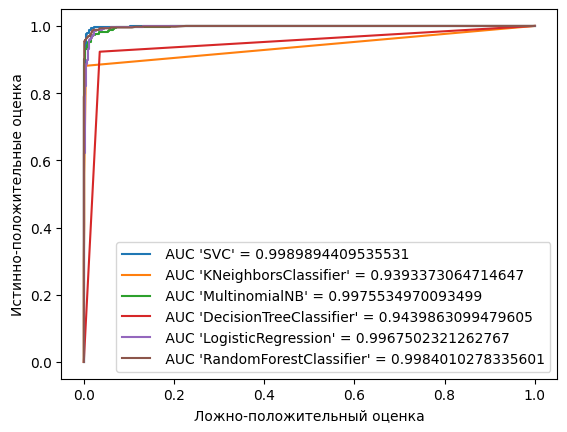

In [38]:
plt.figure()
for model_name, model in dict_of_classic_models.items():
  y_pred_proba = model.predict_proba(X_test)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot (fpr,tpr,label= f" AUC '{model_name}' = "+str(auc))
  plt.legend(loc=4)
  plt.xlabel("Ложно-положительный оценка")
  plt.ylabel("Истинно-положительные оценка")
plt.show()

In [39]:
# sample = "thanks for all your answers guys i know i should have checked the rsync manual but i would rather ge..."
# sample = 'You’ve been selected to receive a free gift!'
# sample = "Congratulations! You've been selected for a free vacation. Click here to claim your prize and enjoy a luxury getaway to a tropical paradise. Don't miss out!"
sample = "Hello [Your Name], we're excited to inform you that you've won a complimentary vacation package to a beautiful destination. Click the link to redeem your prize and start planning your dream getaway. We can't wait for you to experience the luxury and relaxation of this amazing trip!"
tokenized_sample = predobrabotka(sample)
X = vector.transform(tokenized_sample)
X = tfidf_transformer.transform(X)
X_test
for k,c in dict_of_classic_models.items():
  pred = c.predict(X)
  print(k, pred)


SVC [0]
KNeighborsClassifier [0]
MultinomialNB [1]
DecisionTreeClassifier [0]
LogisticRegression [0]
RandomForestClassifier [1]


Я протестила несколько примеров. Первый был не спамом и модель определила правильно, а затем я стала давать спамовые сообщения, но всё менее очевидные, и как можно видеть по выводам, только MultinomialNB и RandomForestClassifier правильно определили label.
 Хотя цифры показывали, что наиболее точными моедли - это SVC и RandomForestClassifier.
Таким образом самая точная модель-  RandomForestClassifier.

## Нейронная сеть

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable

In [41]:
X = dfa.sms.values
Y = dfa.label.values

In [42]:
from keras.preprocessing.text import Tokenizer
t = Tokenizer(num_words=1000)
t.fit_on_texts(X)
X = t.texts_to_matrix(X, mode='tfidf')

In [43]:
print(X)

[[0.         2.78555652 0.         ... 0.         0.         0.        ]
 [0.         2.24736946 1.51920367 ... 0.         0.         0.        ]
 [0.         2.24736946 1.51920367 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.32733261 0.         ... 0.         0.         0.        ]
 [0.         1.32733261 0.         ... 0.         0.         0.        ]]


In [44]:
X.shape

(5021, 1000)

In [45]:
class Model(nn.Module):
    def __init__(self):
        input_size = data.shape 
        hidden_size = 128
        output_size = 2
        super(Model, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size , hidden_size)
        self.l3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = F.relu(self.l1(x))
        out = F.relu(self.l2(out))
        out = self.l3(out)
        return out

In [88]:
model = Model()
print(model)

In [89]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, shuffle=True, random_state=34)

In [90]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.32733261, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.32733261, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.51920367, ..., 0.        , 0.        ,
        0.        ]])

In [91]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Тренировка модели














In [92]:
epochs = 2500
x_train = Variable(torch.from_numpy(X_train)).float()
y_train = Variable(torch.from_numpy(Y_train)).long()
model.train()
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    pred = torch.max(y_pred, 1)[1]
    predict = pred.data.numpy()
    accuracy = accuracy_score(Y_train, predict)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 250 == 0:
      print(f'Эпоха [{epoch + 1}/{epochs}], Потери: {loss}, Accuracy: {accuracy}')
print('Итоговая точность', accuracy)


Эпоха [250/2500], Потери: 0.5522074103355408, Accuracy: 0.7035856573705179
Эпоха [500/2500], Потери: 0.23337948322296143, Accuracy: 0.9593625498007968
Эпоха [750/2500], Потери: 0.0946037545800209, Accuracy: 0.9837981407702523
Эпоха [1000/2500], Потери: 0.05713137984275818, Accuracy: 0.9888446215139443
Эпоха [1250/2500], Потери: 0.03967389836907387, Accuracy: 0.9920318725099602
Эпоха [1500/2500], Потери: 0.029490599408745766, Accuracy: 0.9946879150066401
Эпоха [1750/2500], Потери: 0.022817736491560936, Accuracy: 0.995750332005312
Эпоха [2000/2500], Потери: 0.018219156190752983, Accuracy: 0.9968127490039841
Эпоха [2250/2500], Потери: 0.014975669793784618, Accuracy: 0.9976095617529881
Эпоха [2500/2500], Потери: 0.012623428367078304, Accuracy: 0.997875166002656
Итоговая точность 0.997875166002656


In [93]:
epochs = 200
model.eval()
x_test = Variable(torch.from_numpy(X_test)).float()
y_test = Variable(torch.from_numpy(Y_test)).long()
net_out = model(x_test)
for epoch in range(epochs):
    with torch.no_grad():
        y_pred = model(x_test)
        loss = criterion(y_pred, y_test)
        pred = torch.max(y_pred, 1)[1]
        prediction = pred.data.numpy()
        accuracy = accuracy_score(Y_test, prediction)
print(prediction)
print(Y_test)
print(f' Потери: {loss}, Accuracy: {accuracy}')


[1 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]
 Потери: 0.06671635806560516, Accuracy: 0.9808917197452229


In [94]:
from sklearn.metrics import roc_curve, roc_auc_score

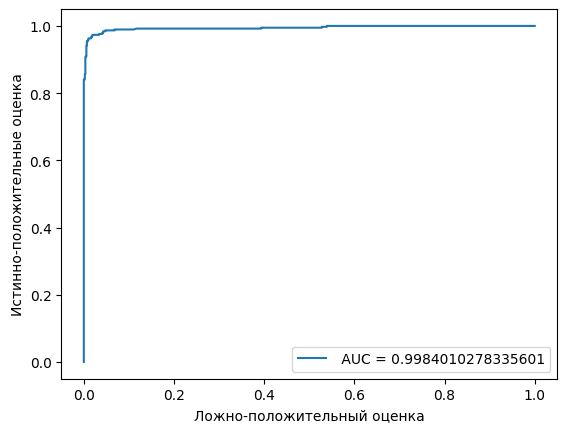

In [95]:
softmax = F.softmax(net_out, dim=1)
probabilities = softmax.detach().cpu().numpy()
auc_score = roc_auc_score(Y_test, probabilities[:, 1])
fpr, tpr, _ = roc_curve(Y_test, probabilities[:, 1])
plt.plot (fpr,tpr,label= f" AUC = "+str(auc))
plt.xlabel("Ложно-положительный оценка")
plt.ylabel("Истинно-положительные оценка")
plt.legend(loc=4)
plt.show()

In [ ]:
a = ["thanks for all your answers guys i know i should have checked the rsync manual but i would rather ge..."]
b = ["You’ve been selected to receive a free gift!"]
c = [ "Congratulations! You've been selected for a free vacation. Click here to claim your prize and enjoy a luxury getaway to a tropical paradise. Don't miss out!"]
d = ["Hello miss Potter, we're excited to inform you that you've won a complimentary vacation package to a beautiful destination. Click the link to redeem your prize and start planning your dream getaway. We can't wait for you to experience the luxury and relaxation of this amazing trip!"]
t = Tokenizer()
t.fit_on_texts(a)
encoded_docs = t.texts_to_matrix(a, mode='binary')
def size(data):
	input_size = len(data[0])
	hidden_size = len(data)
	output_size = 2
	model = Model(input_size, hidden_size, output_size)
	return model

model = size(encoded_docs)
x_test = Variable(torch.from_numpy(encoded_docs)).float()
net_out = model(x_test)
y_pred = model(x_test)
pred = torch.max(y_pred, 1)[1]
prediction = pred.data.numpy()
print(prediction)